In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df = pd.read_csv('../data/cleaned_data_set_v4.csv')
df

,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,1,4,120.000000,14,42055,8.792440,1,3.8604,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,2,4,60.000000,13,41643,8.612780,2,2.8405,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,2,4,120.000000,14,19217,8.663370,3,3.9129,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,1,5,120.000000,12,64864,8.432540,4,3.2406,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,3,6,431.858995,14,13468,8.453179,5,4.2219,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...
20338,2,2,30.000000,4,1340,2.278560,20340,1.0000,427.0,Unknown,Children's Games
20339,2,99,60.000000,5,2154,2.853310,20341,1.0455,1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,2,4,30.000000,3,4006,3.177920,20342,1.0779,5788.0,Roll / Spin and Move,Children's Games
20341,2,6,30.000000,3,3783,2.855670,20343,1.0201,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


In [4]:
df = df[df['Play Time'].apply(lambda x: pd.notnull(x) and x > 0)]

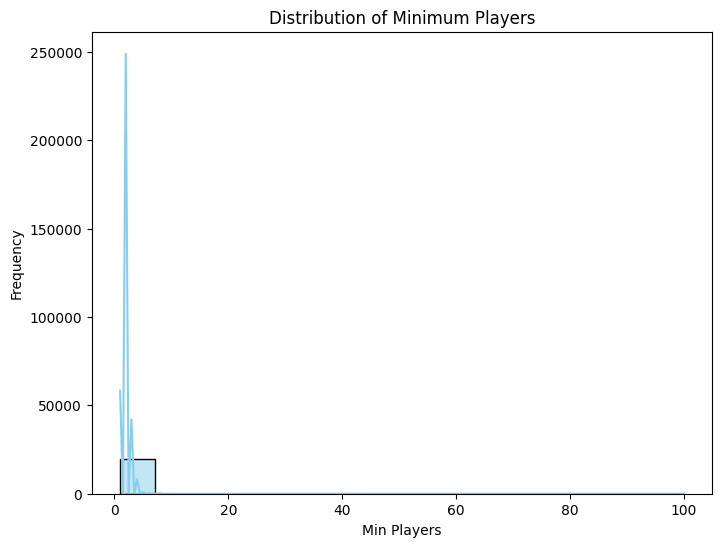

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Min Players'], kde=True, color='skyblue')
plt.title("Distribution of Minimum Players")
plt.xlabel("Min Players")
plt.ylabel("Frequency")
plt.show()

## From this plot we can see that most games have a min players around the 1 mark, let's zoom in on that region.

## Zoomed In Plot
#### As we can see almost all games have min players at the 2 players mark.

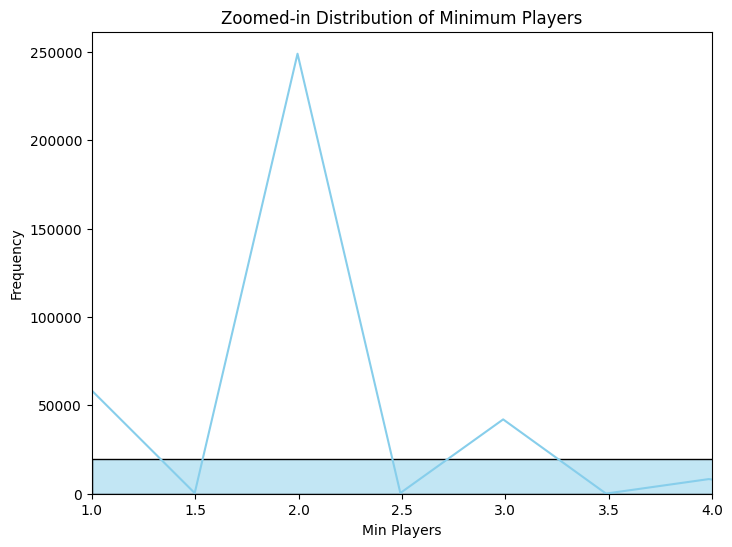

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Min Players'], kde=True, color='skyblue')

plt.xlim(1, 4)  

plt.title("Zoomed-in Distribution of Minimum Players")
plt.xlabel("Min Players")
plt.ylabel("Frequency")
plt.show()

## Distribution of max players
#### From this plot we can see that most games around 2,4,5,6,8 players, with a few in between.

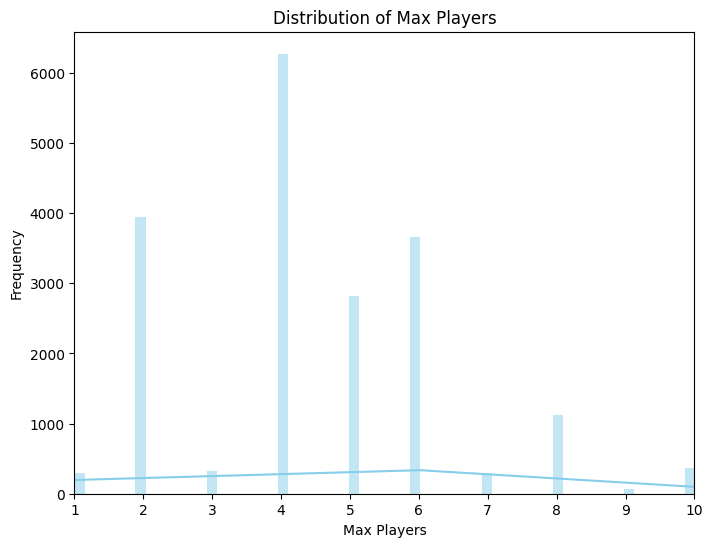

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Max Players'], kde=True, color='skyblue')
plt.xlim(1, 10)
plt.title("Distribution of Max Players")
plt.xlabel("Max Players")
plt.ylabel("Frequency")
plt.show()

## Play Time
#### We use log_scale True for the play time because:
##### Wide Range of Play Time:
###### Play times might range from very short (e.g., 5 minutes) to very long (e.g., several hours or even hundreds of minutes). On a linear scale, the longer durations would dominate the visualization, making it difficult to discern patterns in shorter durations.
#### Logarithmic scaling compresses larger values and spreads out smaller ones, making the distribution easier to interpret.
##### Visualizing Skewed Data:
###### If the data is heavily skewed (e.g., most games have short play times, but a few have extremely long play times), the log scale helps normalize this skewness. It highlights relative differences in smaller values while keeping larger values manageable.

## Explanation
##### The highest count (3339) occurs in the bin with index 40.
##### Using `bin_edges`, the range of this bin (in log-transformed scale) is:
##### $[1.370, 1.405]$
##### Converting back to the original scale:
##### $10^{1.370} \approx 23.42, \quad 10^{1.405} \approx 25.46 $
##### Thus, the original scale range is approximately: $[23.42, 25.46]$
##### Thus, we can conclude that most games are around 25 min long

##### Other Significant Peaks:
- **Index 36**: 1857 occurrences → Log-transformed range: $[1.265, 1.300]$, 
  - Original range: $[18.39, 19.95]$
  
- **Index 44**: 2004 occurrences → Log-transformed range: $[1.545, 1.581]$,
  - Original range: $[35.08, 38.11]$

### Code to Calculate Histogram:

```python
play_time = df['Play Time']  # Replace with your data
log_play_time = np.log10(play_time[play_time > 0])  # Exclude non-positive values to avoid log errors

# Calculate histogram
counts, bin_edges = np.histogram(log_play_time, bins='auto')  # Use log-transformed data
print("Counts:", counts)
print("Bin Edges (log-transformed):", bin_edges)

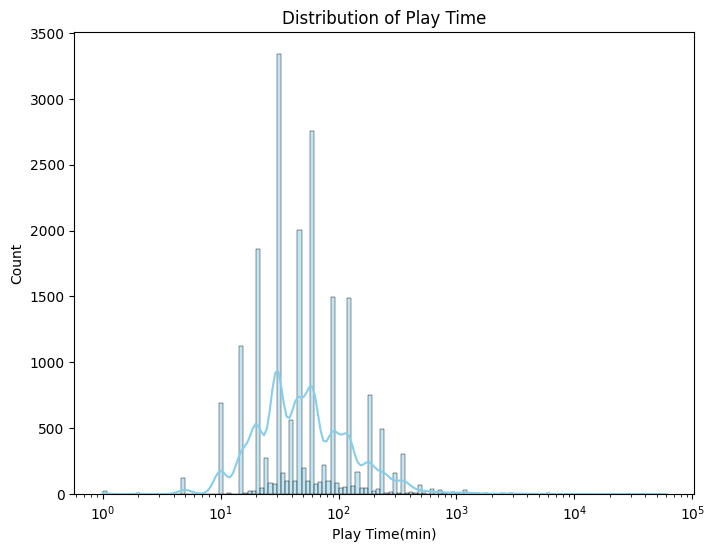

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Play Time'], kde=True, color='skyblue', log_scale=(True,False))
plt.title("Distribution of Play Time")
plt.xlabel("Play Time(min)")
plt.show()

## Rating Average
### Distribution Explanation:

The plot shows the distribution of ratings (0-10) with an average rating centered around **7**. This follows a **normal distribution**, meaning most ratings are clustered near 7, with fewer ratings at the extremes (0 and 10).

- **Mean of 7**: Most ratings fall near 7.
- **Symmetry**: The distribution is symmetric around the mean, so ratings near **6** and **8** are more common than those near **0** and **10**.
- **Spread (Standard Deviation)**: A smaller standard deviation means ratings are tightly packed around 7, while a larger one indicates more variation.
  - For example, with a standard deviation of **1**, most ratings fall between **6** and **8**.


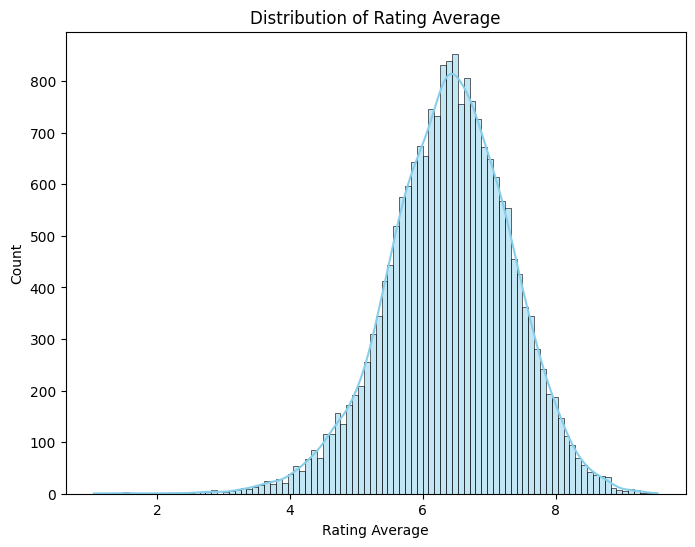

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating Average'], kde=True, color='skyblue')
plt.title("Distribution of Rating Average")
plt.xlabel("Rating Average")
plt.show()